<h1>Mall Customer Segmentation Clustering</h1>

<h3>Importing Libraries</h3>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

<h3>Load The Customers Dataset</h3>

In [64]:
df = pd.read_csv("Mall_Customers.csv")

<h3>Display The Top 7 values for df</h3>

In [65]:
df.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


<h3>Data Exploration For Info, Describe, Null Cells, Duplicated Cells</h3>

In [66]:
print(f'Information of dataset:\n')
print(df.info())
print("Basic Calculation Through Describe: ")
print(df.describe())

Information of dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Basic Calculation Through Describe: 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.50

In [67]:
print("To check Out the total sum of null values: \n")
print(df.isnull().sum())
print("\nTo check Out the total sum of duplicated values: \n")
print(df.duplicated())

To check Out the total sum of null values: 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

To check Out the total sum of duplicated values: 

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


<h3>Catagorical To Numerical Values</h3>

In [68]:
df.drop("CustomerID", axis=1, inplace=True)
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

<h3>Normalization For Scalling</h3>

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [70]:
# plt.figure(figsize=(8,6))
# plt.scatter(scaled_data[:,0], scaled_data[:,1])
# plt.title("Visualisation")
# plt.show()

<h3>PCA For Visualization And Make Dataset Into Two Dimensional</h3>

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.33690046 0.26230645]


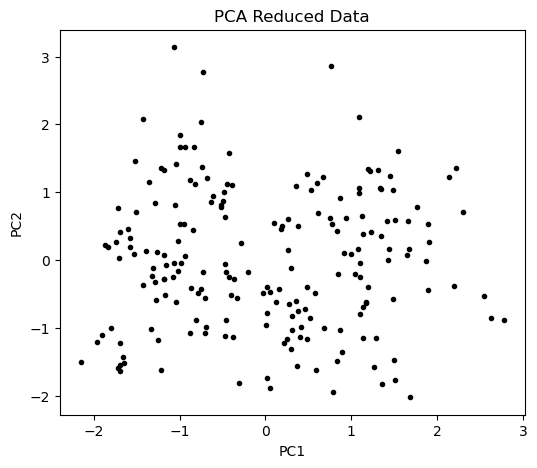

In [76]:
plt.figure(figsize=(6,5))
plt.scatter(reduced_data[:,0], reduced_data[:,1], marker=".", c='k')
plt.title("PCA Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<h3>Kmeans Clustering With Elbow Method For Fixing The Value For 'k'.</h3>

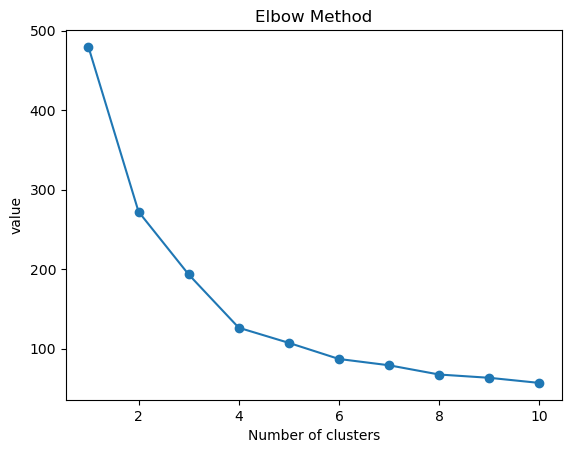

In [77]:
value = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(reduced_data)
    value.append(km.inertia_)

plt.plot(range(1, 11), value, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('value')
plt.title('Elbow Method')
plt.show()

<h3>K-means Clustering</h3>

<h3>As we see that 4 and 5 value best it's curve tell us about "k" value</h3>

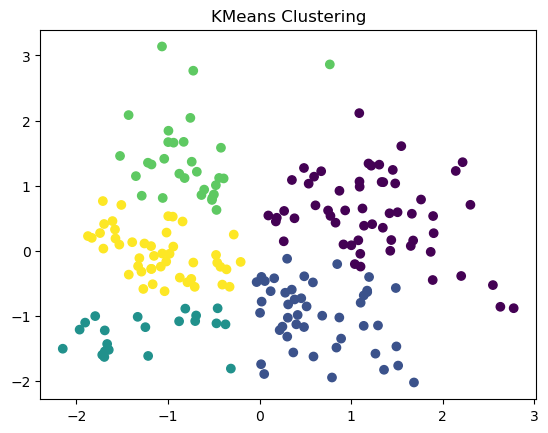

In [84]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(reduced_data)

# Visualization
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()

<h3>DB-Scan Model</h3>

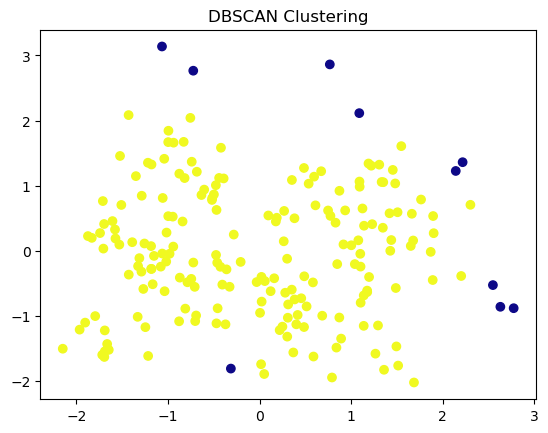

In [90]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(reduced_data)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

<h3>Hierarchical Clustering Model</h3>

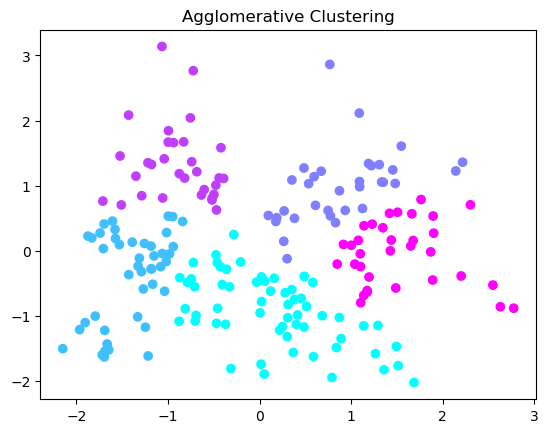

In [92]:
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(reduced_data)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_agglo, cmap='cool')
plt.title("Agglomerative Clustering")
plt.show()

<h3>Model Evaluation For K-Means Clustering</h3>

In [93]:
print("KMeans Silhouette Score:", silhouette_score(reduced_data, labels_kmeans))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(reduced_data, labels_kmeans))

KMeans Silhouette Score: 0.403768937247468
KMeans Davies-Bouldin Index: 0.8469946082836598


<h3>Model Evaluation For DB-Scan Model</h3>

In [94]:
print("DBSCAN Silhouette Score:", silhouette_score(reduced_data, labels_dbscan))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(reduced_data, labels_dbscan))

DBSCAN Silhouette Score: 0.324776629362588
DBSCAN Davies-Bouldin Index: 2.144573522503354


<h3>Model Evaluation For Hierarchical Clustering Model </h3>

In [96]:
print("Hierarchical Clustering Silhouette Score:", silhouette_score(reduced_data, labels_agglo))
print("Hierarchical Clustering Davies-Bouldin Index:", davies_bouldin_score(reduced_data, labels_agglo))

Hierarchical Clustering Silhouette Score: 0.34581930903235913
Hierarchical Clustering Davies-Bouldin Index: 0.9111091786283186
